# Fall Problem Session 12
## CIFAR-10 II

In this notebook you will continue to create neural networks to classify the images of the CIFAR-10 data, <a href="https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html</a>. You will make convolutional neural networks (CNNs) and see if they improve upon the feed forward networks from `Fall Problem Session 11`.

In particular, this material will touch on the following lecture notebooks:
- `Lectures/Neural Networks/2. The MNIST Data Set`,
- `Lectures/Neural Networks/3. Multilayer Neural Networks`,
- `Lectures/Neural Networks/4. keras`,
- `Lectures/Neural Networks/5. Introduction to Convolutional Neural Networks` and
- `Lectures/Neural Networks/7. Loading Pre-Trained Models`.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Load and prepare the data

Load the `cifar10` data from `keras.datasets`, scale the pixel values and make a validation split.

In [5]:
## import cifar10 from keras.datasets
from keras.datasets import cifar10


## import train_test_split
from sklearn.model_selection import train_test_split

In [7]:
## Load the data
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

## scale the data
x_train_scale = x_train/255
x_test_scale = x_test/255


In [8]:
## make the validation set
x_tt,x_val,y_tt,y_val = train_test_split(x_train_scale,
                                         y_train,
                                        shuffle=True,
                                        test_size = 0.1,
                                        random_state = 100,
                                        stratify = y_train)


#### 2. A first convolutional neural network

In this problem you will make your first CNN. 

##### a. 

First import everything you will need from `keras`.

In [9]:
## Import what you need from keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical



##### b.

Try building a CNN with a single convolutional layer of depth $8$ using a $3\times 3$ filter followed by a pooling layer using a $2\times 2$ filter with size $2$ strides.

Remember that the `X` data here has a different shape than the `X` for the MNIST data. This should impact what you place in the `input_shape` argument of the first convolutional layer.

<i>If training this network seems slow to the point of being unworkable, try changing the depth from $8$ to $4$.</i>

In [35]:
## Make an empty sequential model
model1 = models.Sequential()

## Add the convolutional layer here
model1.add(layers.Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3,)))

## Add the pooling layer here
model1.add(layers.MaxPooling2D((2,2),strides=2))

## Add the flatten layer
model1.add(layers.Flatten())

## Add the feed forward layer, use 100 nodes
model1.add(layers.Dense(100,activation='relu'))

## Add the output layer
model1.add(layers.Dense(10,activation='softmax'))

## Same compile step from notebook 11
model1.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [36]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1800)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               180100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 181,334
Trainable params: 181,334
Non-trainable params: 0
________________________________________________

In [45]:
print(x_tt.shape[1:],x_train.shape[1:])

(32, 32, 3) (32, 32, 3)


In [37]:
## fit the model for 25 epochs, this can take a little bit
## remember the validation data argument.
n_epochs=25
history1 = model1.fit(x_tt, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(x_val,to_categorical(y_val)))

history_dict1 = history1.history

Epoch 1/25
88/88 [==============================] - 6s 68ms/step - loss: 1.8671 - accuracy: 0.3364 - val_loss: 1.7289 - val_accuracy: 0.3804
Epoch 2/25
88/88 [==============================] - 6s 65ms/step - loss: 1.6506 - accuracy: 0.4207 - val_loss: 1.6110 - val_accuracy: 0.4524
Epoch 3/25
88/88 [==============================] - 5s 60ms/step - loss: 1.5548 - accuracy: 0.4555 - val_loss: 1.5282 - val_accuracy: 0.4652
Epoch 4/25
88/88 [==============================] - 5s 58ms/step - loss: 1.4945 - accuracy: 0.4780 - val_loss: 1.4869 - val_accuracy: 0.4852
Epoch 5/25
88/88 [==============================] - 5s 52ms/step - loss: 1.4367 - accuracy: 0.4980 - val_loss: 1.3981 - val_accuracy: 0.5076
Epoch 6/25
88/88 [==============================] - 5s 52ms/step - loss: 1.3934 - accuracy: 0.5106 - val_loss: 1.4293 - val_accuracy: 0.4884
Epoch 7/25
88/88 [==============================] - 5s 56ms/step - loss: 1.3588 - accuracy: 0.5247 - val_loss: 1.3971 - val_accuracy: 0.5084
Epoch 8/25
88

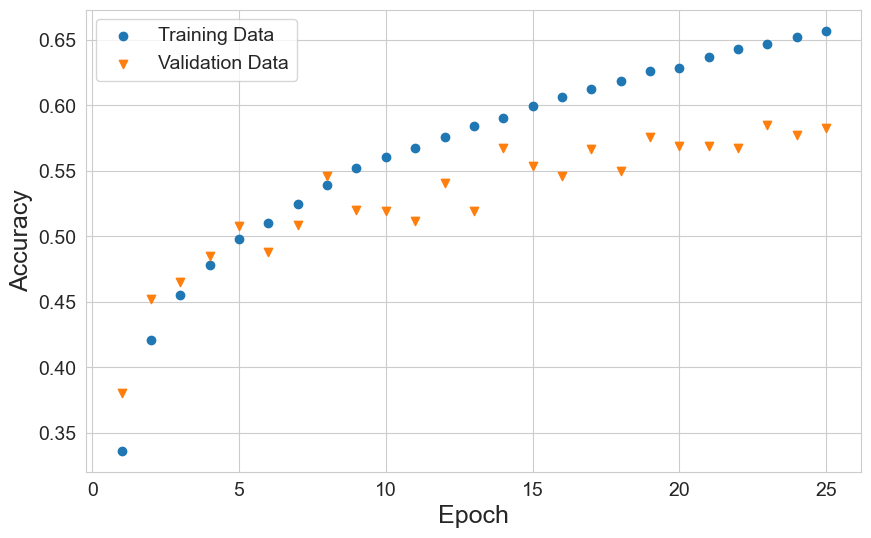

In [40]:
## Plot the training set accuracy and the validation set accuracy
## against the number of epochs trained
plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

#### 3. A CNN with padding

##### a.

Add in the `padding='same'` argument to the convolutional layer from the network above. Fit this network.

##### Sample Solution

In [42]:
## Make an empty sequential model
model2 = models.Sequential()

## Add the convolutional layer here
## remember the padding='same' argument
model2.add(layers.Conv2D(8,(3,3),activation='relu',input_shape=x_tt.shape[1:],padding='same'))

## Add the pooling layer here
model2.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
model2.add(layers.Flatten())

## Add the feed forward layer, use 100 nodes
model2.add(layers.Dense(100, activation='relu'))

## Add the output layer
model2.add(layers.Dense(10, activation='softmax'))

## Some compile step from notebook 11
model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [43]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               204900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 206,134
Trainable params: 206,134
Non-trainable params: 0
________________________________________________

In [44]:
## fit the model for 25 epochs, this can take a bit
n_epochs=25
history2 = model2.fit(x_tt, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(x_val,to_categorical(y_val)))

history_dict2 = history2.history

Epoch 1/25
88/88 [==============================] - 6s 67ms/step - loss: 2.1046 - accuracy: 0.2461 - val_loss: 1.8881 - val_accuracy: 0.3076
Epoch 2/25
88/88 [==============================] - 5s 59ms/step - loss: 1.8068 - accuracy: 0.3596 - val_loss: 1.6980 - val_accuracy: 0.4044
Epoch 3/25
88/88 [==============================] - 5s 58ms/step - loss: 1.6622 - accuracy: 0.4161 - val_loss: 1.5939 - val_accuracy: 0.4422
Epoch 4/25
88/88 [==============================] - 6s 65ms/step - loss: 1.5700 - accuracy: 0.4494 - val_loss: 1.6416 - val_accuracy: 0.4282
Epoch 5/25
88/88 [==============================] - 6s 69ms/step - loss: 1.5078 - accuracy: 0.4747 - val_loss: 1.4792 - val_accuracy: 0.4714
Epoch 6/25
88/88 [==============================] - 5s 56ms/step - loss: 1.4531 - accuracy: 0.4933 - val_loss: 1.4268 - val_accuracy: 0.5038
Epoch 7/25
88/88 [==============================] - 5s 55ms/step - loss: 1.4076 - accuracy: 0.5073 - val_loss: 1.4080 - val_accuracy: 0.5054
Epoch 8/25
88

##### b.

Plot the validation accuracy for both models and see if the addition of padding had a noticeable impact on the model performance.

##### Sample Solution

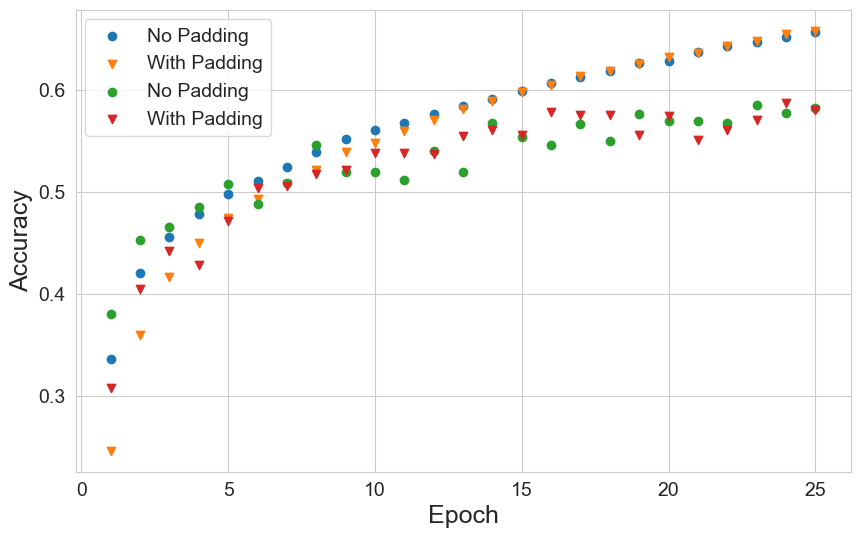

In [47]:
plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['accuracy'],
            label="No Padding")



plt.scatter(range(1,n_epochs+1), 
            history_dict2['accuracy'],
            marker='v',
            label="With Padding")


plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'],
            label="No Padding")



plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'],
            marker='v',
            label="With Padding")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

##### Write any thoughts you have here

#### 4. Adding a dropout layer

Sometimes while building convolutional or recurrent neural networks you will add what is known as a <i>dropout</i> layer before the final feed forward layer of the network.

A dropout layer will randomly turn off input nodes with a probability that you select when setting up the network. For example a dropout layer with probability $0.25$ will turn each of the input nodes to $0$ with probability $0.25$. 

This may seem counterintuitive because we will be getting rid of some of the work the previous layers of our network have done. However, neural networks have a ton of parameters, meaning that they tend to overfit on the training data. By randomly turning some nodes to $0$ we lessen the networks ability to overfit, which may in turn improve performance on observations not included in the training set.

##### a.

For `model3` use your results from above to choose either `model1` or `model2` and then add a dropout layer between  the `.Flatten()` layer and the feed forward `Dense()` layer. Dropout layers can be inserted in `keras` with `layers.Dropout(dropout_probability)`.

In [53]:
## Make an empty sequential model
model3 = models.Sequential()

## Add the convolutional layer here
model3.add(layers.Conv2D(8,(3,3),activation='relu',input_shape=x_tt.shape[1:],padding='same'))

## Add the pooling layer here
model3.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
model3.add(layers.Flatten())

## Add the dropout layer, set the dropout_probability as you'd like
model3.add(layers.Dropout(0.5))

## Add the feed forward layer, use 100 nodes
model3.add(layers.Dense(100, activation='relu'))

## Add the output layer
model3.add(layers.Dense(10, activation='softmax'))

## Some compile step from notebook 11
model3.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [54]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               204900    
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                      

In [55]:
## fit the model for 25 epochs, this can take a bit
n_epochs=25
history3 = model3.fit(x_tt, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(x_val,to_categorical(y_val)))

history_dict3 = history3.history

Epoch 1/25
88/88 [==============================] - 6s 65ms/step - loss: 2.0577 - accuracy: 0.2581 - val_loss: 1.9473 - val_accuracy: 0.3038
Epoch 2/25
88/88 [==============================] - 5s 61ms/step - loss: 1.7891 - accuracy: 0.3652 - val_loss: 1.6837 - val_accuracy: 0.4126
Epoch 3/25
88/88 [==============================] - 6s 63ms/step - loss: 1.6787 - accuracy: 0.4058 - val_loss: 1.6260 - val_accuracy: 0.4280
Epoch 4/25
88/88 [==============================] - 6s 65ms/step - loss: 1.6053 - accuracy: 0.4356 - val_loss: 1.5293 - val_accuracy: 0.4748
Epoch 5/25
88/88 [==============================] - 6s 66ms/step - loss: 1.5549 - accuracy: 0.4543 - val_loss: 1.4568 - val_accuracy: 0.4996
Epoch 6/25
88/88 [==============================] - 6s 70ms/step - loss: 1.5088 - accuracy: 0.4702 - val_loss: 1.4401 - val_accuracy: 0.4946
Epoch 7/25
88/88 [==============================] - 10s 109ms/step - loss: 1.4752 - accuracy: 0.4850 - val_loss: 1.4114 - val_accuracy: 0.5166
Epoch 8/25


##### b.

Plot the validation accuracies of the original model and the version with a dropout layer. Does one seem to outperform the other?

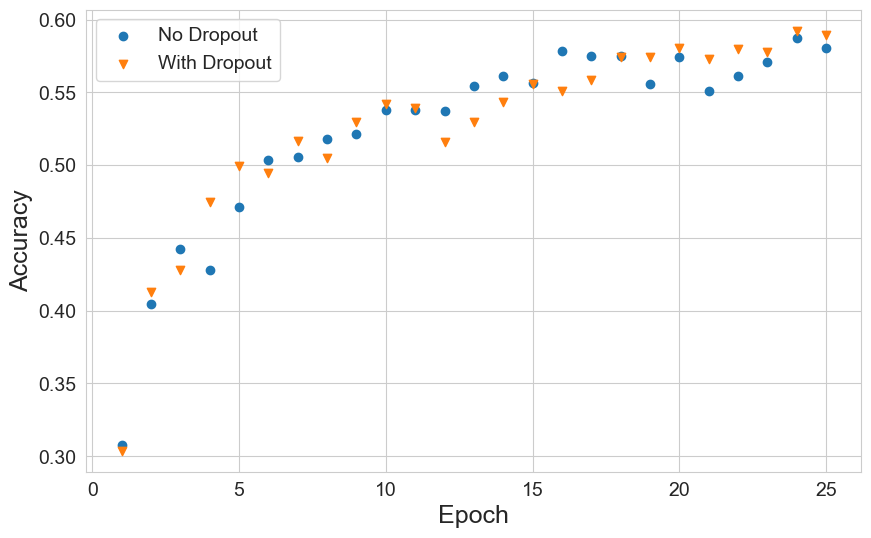

In [57]:
plt.figure(figsize=(10,6))


plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'],
            label="No Dropout")



plt.scatter(range(1,n_epochs+1), 
            history_dict3['val_accuracy'],
            marker='v',
            label="With Dropout")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

##### Write any thoughts you have here

#### 5. Choose a CNN

Choose a CNN from the ones you have tested out in this notebook.

##### Write your model choice down here
model3

#### 6. Choosing a final model

We will now pretend that we are done trying models and want to select a final model for these data.

##### a.

At the end of `Fall Problem Session 11` you saved your best feed forward neural network model to file. Load this network now using `load_model` from `keras.models`.

<i>Note: If you were not able to save a model during `Fall Problem Session 11` you can use the model I saved called `matt_model_fall_pb_sess_11`.</i>

In [66]:
model3.save('test.h5')

ImportError: `save_model()` using h5 format requires h5py. Could not import h5py.

In [2]:
## import load_model here
from keras.models import load_model

ImportError: DLL load failed while importing defs: The specified procedure could not be found.

In [61]:
## Load the model here using load_model
ff_model = load_model('./PCA_CIFAR10/saved_model.pb')

ImportError: Filepath looks like a hdf5 file but h5py is not available. filepath=./PCA_CIFAR10/saved_model.pb

##### b.

Compare the performance of the feed forward model and the CNN model on the validation set.


<i>Note: If you are using `matt_model_fall_pb_sess_11`, this model was trained using the PCA transformed data. You will need to refit PCA on the training portion of the validation split and then transform the validation data prior to finding the validation set performance for this model. The PCA captured 90% of the original data's variance.</i>

In [ ]:
## importing accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
### Feed Forward Network below ###

In [ ]:
### CNN Network below ###

#### 7. Test set performance

##### a.

Retrain your final model on the entire training set. Note that this means you will need to redefine your model and retrain it from scratch.

In [10]:
## Make an empty sequential model
model_final = models.Sequential()

## Add the convolutional layer here
model_final.add(layers.Conv2D(8,(3,3),activation='relu',input_shape=x_tt.shape[1:],padding='same'))

## Add the pooling layer here
model_final.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
model_final.add(layers.Flatten())

## Add the dropout layer, set the dropout_probability as you'd like
model_final.add(layers.Dropout(0.5))

## Add the feed forward layer, use 100 nodes
model_final.add(layers.Dense(100, activation='relu'))

## Add the output layer
model_final.add(layers.Dense(10, activation='softmax'))

## Some compile step from notebook 11
model_final.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [11]:
## fit the model for 25 epochs, this can take a bit
n_epochs=25
history = model_final.fit(x_train, 
                      to_categorical(y_train), 
                      epochs=n_epochs, 
                      batch_size=512)

Epoch 1/25
98/98 [==============================] - 6s 56ms/step - loss: 22.7720 - accuracy: 0.1059
Epoch 2/25
98/98 [==============================] - 5s 52ms/step - loss: 2.3071 - accuracy: 0.0995
Epoch 3/25
98/98 [==============================] - 5s 54ms/step - loss: 2.3065 - accuracy: 0.0997
Epoch 4/25
98/98 [==============================] - 4s 40ms/step - loss: 2.3037 - accuracy: 0.0989
Epoch 5/25
98/98 [==============================] - 7s 69ms/step - loss: 2.3034 - accuracy: 0.0974
Epoch 6/25
98/98 [==============================] - 5s 51ms/step - loss: 2.3034 - accuracy: 0.0984
Epoch 7/25
98/98 [==============================] - 5s 49ms/step - loss: 2.3028 - accuracy: 0.0964
Epoch 8/25
98/98 [==============================] - 4s 45ms/step - loss: 2.3045 - accuracy: 0.1002
Epoch 9/25
98/98 [==============================] - 4s 37ms/step - loss: 2.3029 - accuracy: 0.0993
Epoch 10/25
98/98 [==============================] - 5s 50ms/step - loss: 2.2650 - accuracy: 0.1237
Epoch 11

##### b.

Find the accuracy on the test set.

In [18]:
model_final.evaluate(x_test,to_categorical(y_test))

313/313 [==============================] - 1s 4ms/step - loss: 1.6325 - accuracy: 0.3835


[1.6325472593307495, 0.38350000977516174]

In [15]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In this notebook we stuck with very small CNNs in order to keep the training time down as much as possible.

You are welcome to build bigger CNNs to see if you can improve upon the performance you have already achieved. You should be prepared, however, for the training time on such networks to be quite long, in comparison to what you did here. Per the documentation, <a href="http://www.cs.toronto.edu/~kriz/cifar.html">http://www.cs.toronto.edu/~kriz/cifar.html</a>, the benchmark model takes over an hour to train, but does attain $82\%$ test set accuracy.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)